In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

import seaborn as sns



In [2]:
FileName = "datasets/DC_Properties.csv"
df = pd.read_csv(FileName)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
df2 = df[['PRICE', 'ROOMS', 'BEDRM','BATHRM', 'ZIPCODE']]

In [5]:
df3 = df2.rename(index=lambda x: x + 1)

In [6]:
df3.dropna(axis=1, how='all', inplace = True)

In [7]:
df3.corr()

,PRICE,ROOMS,BEDRM,BATHRM,ZIPCODE
PRICE,1.000000,-0.038241,-0.043331,-0.006536,0.001467
ROOMS,-0.038241,1.000000,0.841309,0.677751,-0.053109
BEDRM,-0.043331,0.841309,1.000000,0.655563,-0.071962
BATHRM,-0.006536,0.677751,0.655563,1.000000,-0.063410
ZIPCODE,0.001467,-0.053109,-0.071962,-0.063410,1.000000


In [8]:
import statsmodels.formula.api as smf

In [9]:
result = smf.ols('PRICE ~ ROOMS + BEDRM + BATHRM + ZIPCODE', data=df3).fit()

In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     79.76
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           1.08e-67
Time:                        11:18:26   Log-Likelihood:            -1.6881e+06
No. Observations:               98216   AIC:                         3.376e+06
Df Residuals:                   98211   BIC:                         3.376e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.192e+06   2.76e+07      0.043      0.966    -5.3e+07    5.54e+07
ROOMS      -7.115e+04   1.68e+04     -4.229      0.000   -1.04e+05   -3.82e+04
BEDRM      -3.015e+05   3.18e+04     -9.486      0.000   -3.64e+05   -2.39e+05
BATHRM      3.938e+05   3.41e+04     11.540      0.000    3.27e+05    4.61e+05
ZIPCODE       10.7217   1380.900      0.008      0.994   -2695.826    2717.269
==============================================================================
Omnibus:                   204155.254   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        486547582.366
Skew:                          18.231   Prob(JB):                         0.00
Kurtosis:                     345.875   Cond. No.                     2.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
result = smf.ols('PRICE ~ BEDRM + ZIPCODE', data=df3).fit()

In [12]:
result = smf.ols('PRICE ~ ROOMS + BEDRM + BATHRM', data=df3).fit()


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     106.4
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           9.63e-69
Time:                        11:18:37   Log-Likelihood:            -1.6881e+06
No. Observations:               98216   AIC:                         3.376e+06
Df Residuals:                   98212   BIC:                         3.376e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.406e+06   5.63e+04     24.974      0.000     1.3e+06    1.52e+06
ROOMS      -7.114e+04   1.68e+04     -4.231      0.000   -1.04e+05   -3.82e+04
BEDRM      -3.015e+05   3.18e+04     -9.493      0.000   -3.64e+05   -2.39e+05
BATHRM      3.938e+05   3.41e+04     11.544      0.000    3.27e+05    4.61e+05
==============================================================================
Omnibus:                   204155.299   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        486548331.643
Skew:                          18.231   Prob(JB):                         0.00
Kurtosis:                     345.875   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
result = smf.ols('PRICE ~ ROOMS + BEDRM', data=df3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     92.77
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           5.58e-41
Time:                        11:18:39   Log-Likelihood:            -1.6881e+06
No. Observations:               98216   AIC:                         3.376e+06
Df Residuals:                   98213   BIC:                         3.376e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.528e+06   5.53e+04     27.619      0.000    1.42e+06    1.64e+06
ROOMS      -1.434e+04   1.61e+04     -0.891      0.373   -4.59e+04    1.72e+04
BEDRM      -1.965e+05   3.05e+04     -6.454      0.000   -2.56e+05   -1.37e+05
==============================================================================
Omnibus:                   204068.410   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        485186052.355
Skew:                          18.214   Prob(JB):                         0.00
Kurtosis:                     345.393   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
result = smf.ols('PRICE ~ BEDRM + BATHRM', data=df3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     150.6
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           5.19e-66
Time:                        11:18:41   Log-Likelihood:            -1.6881e+06
No. Observations:               98216   AIC:                         3.376e+06
Df Residuals:                   98213   BIC:                         3.376e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.306e+06   5.11e+04     25.559      0.000    1.21e+06    1.41e+06
BEDRM      -3.946e+05   2.29e+04    -17.231      0.000   -4.39e+05    -3.5e+05
BATHRM      3.516e+05   3.26e+04     10.777      0.000    2.88e+05    4.16e+05
==============================================================================
Omnibus:                   204169.922   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        486744883.047
Skew:                          18.234   Prob(JB):                         0.00
Kurtosis:                     345.944   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

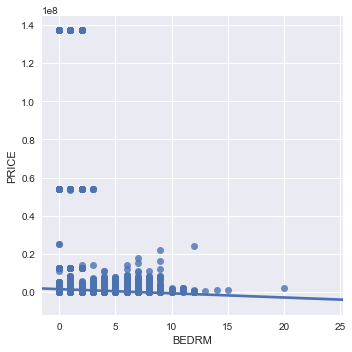

In [16]:
#make a scatterplot
sns.lmplot(x='BEDRM', y='PRICE', data=df3)

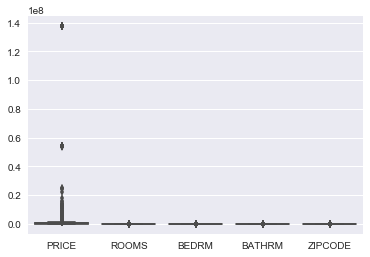

In [20]:
sns.boxplot(data=df3)

In [18]:
df3.isnull().sum()

PRICE      60741
ROOMS          0
BEDRM          0
BATHRM         0
ZIPCODE        1
dtype: int64

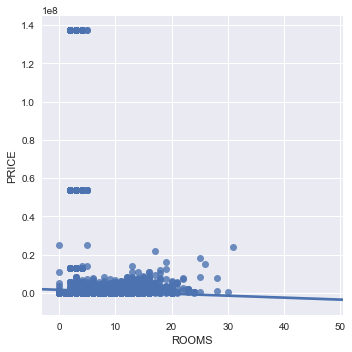

In [21]:
#make a scatterplot
sns.lmplot(x='ROOMS', y='PRICE', data=df3)

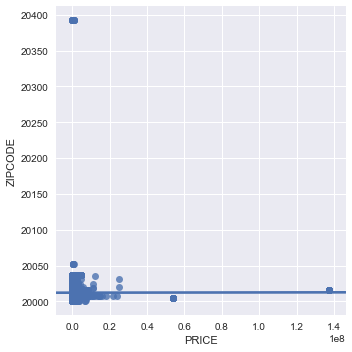

In [23]:
#make a scatterplot
sns.lmplot(x='PRICE', y='ZIPCODE', data=df3)